** More detials of the table, 'titanic-data.csv'**

**Import Part**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sean

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Get the data from titanic-data.csv by pandas.read_csv()

In [3]:
titanic_info = pd.read_csv('titanic-data.csv')

## Questions

** The main topic is <font color=red>SURVIVED</font> ** 

After watching the describle of titanic_info, PassengerId can be ignored firstly.

<ul>
    <li>What is the relationship between survival and age?</li>
    <li>What is the relationship between survival and sex?</li>
    <li>What is the relationship between survival and sibsp/parch?</li>
    <li>What is the relationship between survival and fare?</li>
    <li>What is the relationship between survival and cabin/Embarked?</li>
</ul>

Get the basic info about the titanic_info

In [4]:
titanic_info['count'] = titanic_info.apply(lambda x: 1, axis=1)
titanic_info.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  count  
count  891.000000  891.000000  891.0  
mean     0.381594   32.204208    1.0  
std      0.806057   49.693429    0.0  
min      0.000000    0.000000    1.0  
25%      0.000000    7.910400    1.0  
50%      0.000000   14.454200    1.0  
75%      0.000000   31.000000    1.0  
max      6.000000  512.329200    1.0

In order to reliability of the results in analyzing, I have to make sure the most of values are <font color=red>valid</font> in the data

In [5]:
titanic_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
count          891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
# Groupby.mean()
def groupby_mean(data, *args1):
    return data.groupby(args1[0]).mean()[args1[1]]

# Groupby_sum()
def groupby_sum(data, *args1):
    return data.groupby(args1[0]).sum()[args1[1]]


# Drawing
def plot_bar(data, title=None, x_item=None, y_item=None):
    data.plot(kind='bar')
    plt.title(title)
    plt.xlabel(x_item)
    plt.ylabel(y_item)


After data.info() function, I got total number of passengers is 891, but the Cabin is 204, it less than a quater of total.

The decision is ignore all the Cabin.

Age and Embarked are less than total, but the gaps are small.

The decision is that missing-Age are fill in something, for the value of the least change, <font color=green>30</font> is the value. two missing-Embarked are fill in <font color=green>'S'</font>, S-total is much larger than others, it is hard to change by two items.

In [7]:
titanic = titanic_info.drop(['Cabin'], axis=1)
titanic['Age'] = titanic['Age'].fillna(30)
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In all passengers, survivors were <font color=red>younger</font> than victims.

Maybe younger people was moving faster than older, but I like to say that young is future in the peoples' mind when they had to face the choice about life and death, and the limited chances.

In [8]:
survived_compare_age = groupby_mean(titanic, ['Survived'], ['Age'])
survived_compare_age

Age
Survived           
0         30.483607
1         28.595526

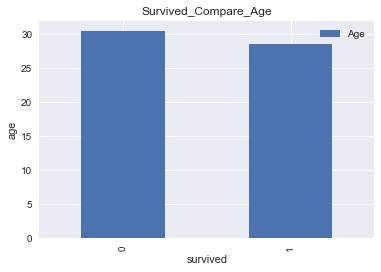

In [9]:
plot_bar(survived_compare_age, 'Survived_Compare_Age', 'survived', 'age')

According to the boxplot, the survivors' age range is greater than victims.

The all most same mean age in survivors and victims.

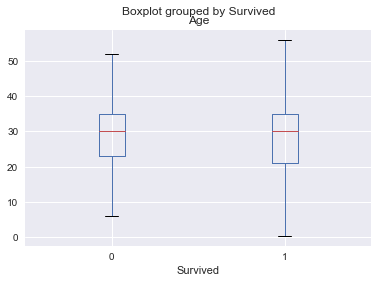

In [10]:
titanic.boxplot(column='Age', by='Survived', showfliers = False)

The most people in [20, 30], and the most survivors in [20, 30], but the people's survival rate was not good. Which less than a quater.

The best survival rate is babies and children in [0, 10], which more than a half.

The worst survival rate is old people in (60, 80), there were a few old people, just one fifth.

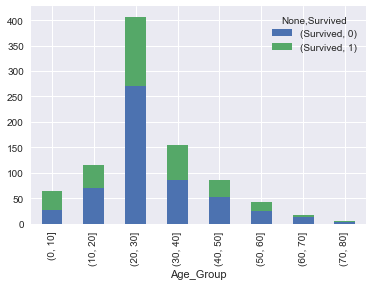

In [174]:
bins = np.arange(0, 90, 10)
titanic['Age_Group'] = pd.cut(titanic['Age'], bins)
age_group_compare = titanic.groupby(['Age_Group', 'Survived'])[['Survived']].count()
age_group_compare.unstack().plot(kind='bar', stacked=True)

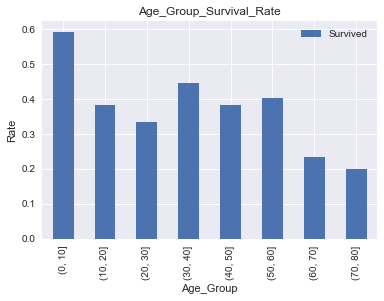

In [175]:
age_group = set(titanic['Age_Group'])
age_group_survival_rate = groupby_mean(titanic, ['Age_Group'], ['Survived'])
plot_bar(age_group_survival_rate, 'Age_Group_Survival_Rate', 'Age_Group', 'Rate')

In all survivors, the number of <font color=red>female-survivors</font> is twice as much as male-surivors.

Obviously, <font color=red>females</font> got high priority in all.

In [176]:
survived_compare_sex_sum = groupby_sum(titanic, ['Sex'], ['Survived', 'count'])
survived_compare_sex_sum

Survived  count
Sex                    
female       233    314
male         109    577

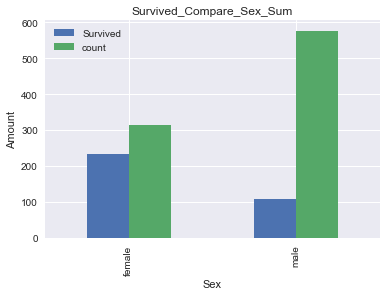

In [177]:
plot_bar(survived_compare_sex_sum, 'Survived_Compare_Sex_Sum', 'Sex', 'Amount')

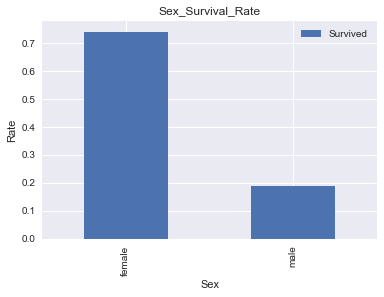

In [178]:
sex_survival_rate = groupby_mean(titanic, ['Sex'], ['Survived'])
plot_bar(sex_survival_rate, 'Sex_Survival_Rate', 'Sex', 'Rate')

First sight in the data that is confusing me, the mean-age of female-survivors was greater than female-victims.

younger males got high priority to be saved, but females was not.

I thought that there were serveral possible reasons :
<ul>
    <li>Pregnant women</li>
    <li>mothers with babies</li>
    <li>noble ladies</li>
</ul>

In [179]:
sex_compare_mean = groupby_mean(titanic, ['Sex', 'Survived'], ['Age'])
sex_compare_mean

Age
Sex    Survived           
female 0         26.086420
       1         29.025751
male   0         31.244658
       1         27.675872

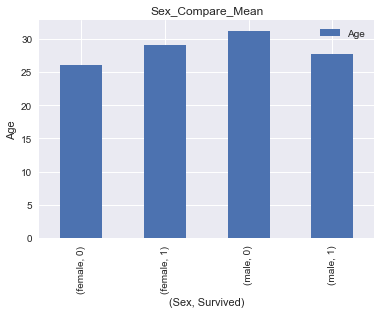

In [180]:
plot_bar(sex_compare_mean, 'Sex_Compare_Mean', '(Sex, Survived)', 'Age')

It is obviously, <font color=red>alone</font> person got more opportunities to lived.

If people with parents, children or some relatives, people had to take care of kins, which was slower moving instead of fast-alone in escaping, chances were missing every second in disaster.

In [182]:
parch_compare = groupby_sum(titanic, ['Parch'], ['Survived'])
sibsp_compare = groupby_sum(titanic, ['SibSp'], ['Survived'])
parch_sibsp_compare = groupby_sum(titanic, ['Parch', 'SibSp'], ['Survived'])

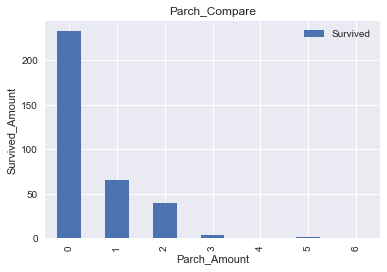

In [183]:
plot_bar(parch_compare, 'Parch_Compare', 'Parch_Amount', 'Survived_Amount')

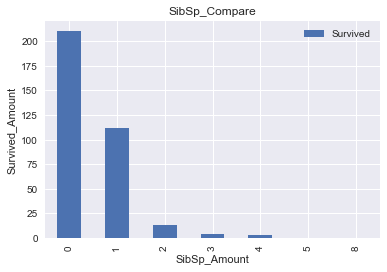

In [184]:
plot_bar(sibsp_compare, 'SibSp_Compare', 'SibSp_Amount', 'Survived_Amount')

In [109]:
parch_sibsp_compare

Survived  count
Parch SibSp                 
0     0           163    537
      1            64    123
      2             4     16
      3             2      2
1     0            25     38
      1            34     57
      2             6      7
      3             0      7
      4             0      9
2     0            21     29
      1            12     19
      2             2      4
      3             2      7
      4             3      9
      5             0      5
      8             0      7
3     0             1      1
      1             1      3
      2             1      1
4     0             0      1
      1             0      3
5     0             0      2
      1             1      3
6     1             0      1

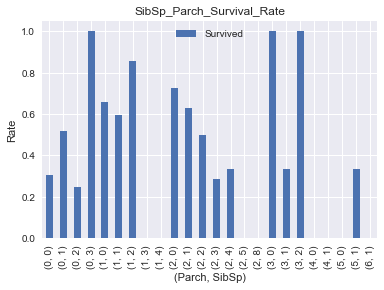

In [186]:
sibsp_parch_survival_rate = groupby_mean(titanic, ['Parch', 'SibSp'], ['Survived'])
plot_bar(sibsp_parch_survival_rate, 'SibSp_Parch_Survival_Rate', '(Parch, SibSp)', 'Rate')

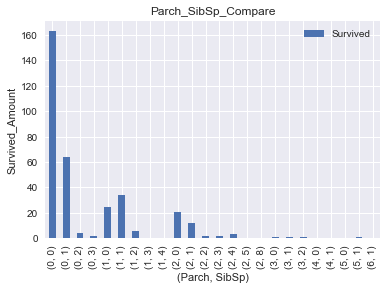

In [188]:
plot_bar(parch_sibsp_compare, 'Parch_SibSp_Compare', '(Parch, SibSp)', 'Survived_Amount')

Except female, younger, alone or vulnerable reasons, in saving action, rescue team must pay more attention to the <font color=red>higher fare</font> passengers, who were rich or noble.

In [189]:
fare = groupby_mean(titanic, ['Survived'], ['Fare'])
fare

Fare
Survived           
0         22.117887
1         48.395408

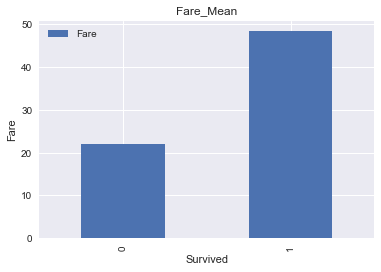

In [191]:
plot_bar(fare, 'Fare_Mean', 'Survived', 'Fare')

I believed more females with high fare who were noble ladies or with rich spouses.

In [192]:
fare_sex_compare = groupby_mean(titanic, ['Survived', 'Sex'], ['Fare'])
fare_sex_compare

Fare
Survived Sex              
0        female  23.024385
         male    21.960993
1        female  51.938573
         male    40.821484

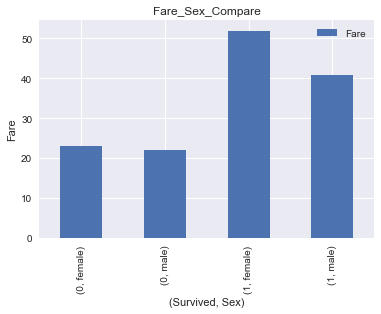

In [193]:
titanic.boxplot(column='Fare', by='Survived', showfliers=False)plot_bar(fare_sex_compare, 'Fare_Sex_Compare', '(Survived, Sex)', 'Fare')

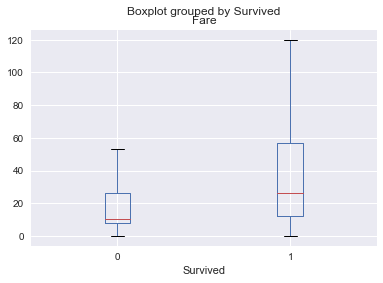

In [12]:
titanic.boxplot(column='Fare', by='Survived', showfliers=False)

C - France, Q - New Zealand, S - UK

Many passengers came from UK, although Franch-survival_rate was greatest, which more  than a half, the data could say nothing. 

The data still had said that female-survival_rate was the highest

In [194]:
embarked = groupby_sum(titanic, ['Embarked'], ['Survived', 'count'])
embarked

Survived  count
Embarked                 
C               93    168
Q               30     77
S              219    646

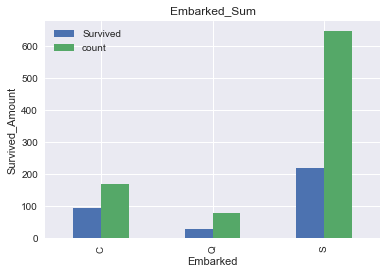

In [195]:
plot_bar(embarked, 'Embarked_Sum', 'Embarked', 'Survived_Amount') 

In [196]:
embarked_sex = groupby_sum(titanic, ['Embarked', 'Sex'], ['Survived', 'count'])
embarked_sex

Survived  count
Embarked Sex                    
C        female        64     73
         male          29     95
Q        female        27     36
         male           3     41
S        female       142    205
         male          77    441

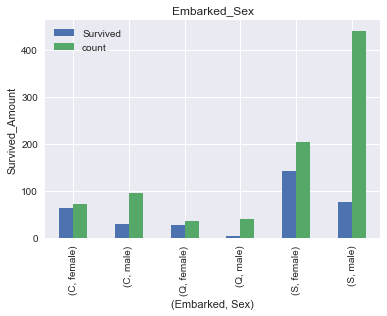

In [197]:
plot_bar(embarked_sex, 'Embarked_Sex', '(Embarked, Sex)', 'Survived_Amount')

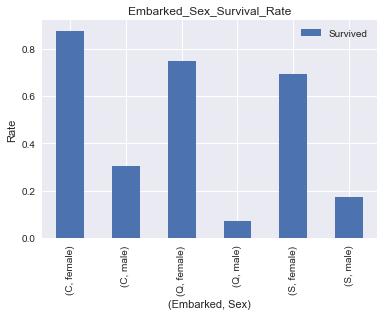

In [198]:
embarked_sex_survival_rate = groupby_mean(titanic, ['Embarked', 'Sex'], ['Survived'])
plot_bar(embarked_sex_survival_rate, 'Embarked_Sex_Survival_Rate', '(Embarked, Sex)', 'Rate')

## Conclusion

<p>
About 177 ages and 2 embarked I filled in, 2 embarked got few changes to deviation, 177 ages is equal mean age of all, maybe some changes to deviation.
</p>

<p>
Survived, Sex, Fare are all valid values, but 891 is less than 1517, the victims of titanic, it can not mean the turth, but closer to the turth. Can do reference.
</p>

<p>
The survival rate was close to <font color=red>sex, age</font> and <font color=red>fare</font>.
</p>
<p>
About sex, <font color=red>female</font> is Vulnerable Groups in social, they got highest priority to alive.
</p>
<p>
About age, <font color=red>old people and children</font> are Vulnerable Groups, but it is too complicate to understand when people facing disaster, humanity or morality and so on. just say that in the time, old people thought that the future is belong to <font color=red>young</font>.
</p>
<p>
About fare, this is a stone rule that <font color=red>more paid</font>, more return, whatever service or productsï¼Œ expensive price with excellent experience.
</p>
<p>
About others, the Cabin, Pclass or Embarked, it's hard to connect. The time what were you doing, where you were or what were you thinking, it was a strong randomness and unpredictability. Maybe is luck or unluck, that is difficult to analyze.
</p>
